#<center><b size='40'>Analysis on Online Retail Dataset<b></center>#

---
<a name = Section1></a>
# **1. Introduction**
---

- Recently, it has been recognized that **precision marketing** has become a key means of generating profit.

- The availability of customer data and transaction records provides better understanding of customers’ **buying behaviors** and **preferences**.

- In the increasingly **competitive environment**, enterprises have to create a decision-making model for precision marketing.

<center><img width=50% src="https://image.freepik.com/free-vector/digital-marketing-advertising-infographic-white-background_18591-6516.jpg"></center>

- The case study considers a **marketing problem** where an online retailer provides different all-occasion gift products.

- This case study demonstrates that our **proposed decisions** and insights are capable of providing a good **precision marketing strategy**.

- The real-world data from a company in UK were collected and used in this case study to illustrate how to implement EDA.

---
<a name = Section2></a>
# **2. Problem Statement**
---

- **The E-Shop** is an online retail company based in the **United Kingdom** (UK) that sells **unique all-occasion gifts**.

- They track online **traffic** on their website from **several countries** along with the UK on daily basis.

- In 2011, they observed a **hike in online traffic** at their e-retail shop.

- They plan to <font color="red">**segment customers**</font> and <font color="red">**target**</font> them with <font color="red">**advertisements**</font> based on their past purchases.

- They have hired a data scientist to guide them with the task. Let's say you are the data scientist they have approached.

- You have to analyze their **transactional data** from December 2010 to December 2011.

- You have to present an **initial investigation** on this data to check for various patterns, unusual transactions, cancellations, and bulk orders.

- This would be a **leading step** to help the company form proper customer segments.



# **3. Importing Libraries**

In [ ]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
# from pandas_profiling import ProfileReport                          # Importing Pandas Profiling (To generate Univariate Analysis)

#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface of matplotlib
import seaborn as sns                                               # Importing seaborn library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
import datetime                                                     # For datetime operations
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

# **4. Data Acquisition & Description**

- The dataset consists of information about the customers, transactions, and products of an online retail site.

| Records | Features | Dataset Size |
| :--: | :--: | :--: |
| 541909 | 8 | 22.6 MB |

<br>

| # | Feature Name | Feature Description |
|:--:|:--|:--|
|1| InvoiceNo | A 6-digit number uniquely assigned to each transaction. 'C' in the beginning indicates a Cancellation |
|2|StockCode | Product Code, a 5-digit number uniquely assigned to each distinct product |
|3| Description |	Product (item) Name |
|4| Quantity |	The quantities of each product (item) per transaction |
|5| InvoiceDate |	The day and time when each transaction was generated |
|6| UnitPrice |	Product price per unit in Sterling |
|7| CustomerID |	A 5-digit number uniquely assigned to each customer |
|8| Country |	The name of the country where each customer resides |

In [ ]:
retail_data = pd.read_excel(io='https://github.com/insaid2018/Term-1/blob/master/Data/Casestudy/online_retail.xlsx?raw=true')
print('Shape of the dataset:', retail_data.shape)
retail_data.head()

Shape of the dataset: (541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
retail_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


**Observations**

1. There are total 541909 rows and 8 columns are present in data set
2. Missing values are present in description and customerId columns

In [ ]:
retail_data.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [ ]:
retail_data.duplicated().value_counts()

,count
False,536641
True,5268


**Observations**

1. outliers are present in quantity and unit price
2. Duplicate rows are present in data set

**Data Cleaning**

**Handling Missing Values**

In [ ]:
retail_data.drop('Description', inplace=True, axis=1)

In [ ]:
retail_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Quantity     541909 non-null  int64         
 3   InvoiceDate  541909 non-null  datetime64[ns]
 4   UnitPrice    541909 non-null  float64       
 5   CustomerID   406829 non-null  float64       
 6   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 28.9+ MB


In [ ]:
retail_data['CustomerID'] = retail_data['CustomerID'].fillna('Others')

In [ ]:
retail_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Quantity     541909 non-null  int64         
 3   InvoiceDate  541909 non-null  datetime64[ns]
 4   UnitPrice    541909 non-null  float64       
 5   CustomerID   541909 non-null  object        
 6   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 28.9+ MB


**Removing Duplicates Rows**

In [ ]:
retail_data = retail_data.drop_duplicates()

In [ ]:
retail_data.duplicated().value_counts()

,count
False,536639


In [ ]:
retail_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 536639 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    536639 non-null  object        
 1   StockCode    536639 non-null  object        
 2   Quantity     536639 non-null  int64         
 3   InvoiceDate  536639 non-null  datetime64[ns]
 4   UnitPrice    536639 non-null  float64       
 5   CustomerID   536639 non-null  object        
 6   Country      536639 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 32.8+ MB


In [ ]:
retail_data.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
retail_data['StockCode'].value_counts()

,count
StockCode,
85123A,2301
22423,2192
85099B,2156
47566,1720
20725,1626
...,...
23652,1
23602,1
23664,1


In [ ]:
retail_data['StockCode']

,StockCode
0,85123A
1,71053
2,84406B
3,84029G
4,84029E
...,...
541904,22613
541905,22899
541906,23254
541907,23255


In [ ]:
stocklen=retail_data['StockCode'].str.len()
stocklen

,StockCode
0,6.0
1,NaN
2,6.0
3,6.0
4,6.0
...,...
541904,NaN
541905,NaN
541906,NaN
541907,NaN


In [ ]:
retail_data = retail_data[~(retail_data['StockCode'].str.len() <= 4)]

In [ ]:
retail_data[retail_data['UnitPrice'] == 0]

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,56,2010-12-01 11:52:00,0.0,Others,United Kingdom
1970,536545,21134,1,2010-12-01 14:32:00,0.0,Others,United Kingdom
1971,536546,22145,1,2010-12-01 14:33:00,0.0,Others,United Kingdom
1972,536547,37509,1,2010-12-01 14:33:00,0.0,Others,United Kingdom
1987,536549,85226A,1,2010-12-01 14:34:00,0.0,Others,United Kingdom
...,...,...,...,...,...,...,...
536981,581234,72817,27,2011-12-08 10:33:00,0.0,Others,United Kingdom
538504,581406,46000M,240,2011-12-08 13:58:00,0.0,Others,United Kingdom
538505,581406,46000S,300,2011-12-08 13:58:00,0.0,Others,United Kingdom
538554,581408,85175,20,2011-12-08 14:06:00,0.0,Others,United Kingdom


In [ ]:
retail_data = retail_data[~(retail_data['UnitPrice'] == 0)]

In [ ]:
retail_data['Quantity'].describe()

,Quantity
count,531305.000000
mean,9.958600
std,216.987039
min,-80995.000000
25%,1.000000
50%,3.000000
75%,10.000000
max,80995.000000


In [ ]:
retail_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 531305 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    531305 non-null  object        
 1   StockCode    531305 non-null  object        
 2   Quantity     531305 non-null  int64         
 3   InvoiceDate  531305 non-null  datetime64[ns]
 4   UnitPrice    531305 non-null  float64       
 5   CustomerID   531305 non-null  object        
 6   Country      531305 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 32.4+ MB


In [ ]:
retail_data.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
retail_data['year'] = retail_data['InvoiceDate'].dt.year
retail_data['month'] = retail_data['InvoiceDate'].dt.month
retail_data['hour'] = retail_data['InvoiceDate'].dt.hour

# We get Monday = 0 to Sunday = 6 when we convert to day of the week.
# We will add +1 to every day of week so we can get Monday = 1 to Sunday = 7
retail_data['day'] = (retail_data['InvoiceDate'].dt.dayofweek) + 1

In [ ]:
# np.dtype(retail_data['month'])

retail_data['month'].value_counts()

,count
month,
11,82745
12,66631
10,59435
9,49458
7,38838
5,36299
6,36188
3,35947
8,34735


In [ ]:
month = ['January', 'February','March','April','May','June','July','August','September','October','November','December']
retail_data['month'] = retail_data['month'].astype(str)
retail_data['month'] = retail_data['month'].replace(['1','2','3','4','5','6','7','8','9','10','11','12'],month)

In [ ]:
retail_data.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,hour,day,Revenue
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,December,8,3,15.30
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,December,8,3,20.34
2,536365,84406B,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,December,8,3,22.00
3,536365,84029G,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,December,8,3,20.34
4,536365,84029E,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,December,8,3,20.34


**Observations**

1. Missing value from customerID column is replace with 'Others'
2. Description column is removed
3. Duplicate rows are removed from the dataset
4. inconsistent data from stockcode is removed
5. No outliers are removed as it is quantity

# **Exploratory Data Analysis**

**<h4>Question:** How to cerify for cancelled transactions?</h4>

- According to Section 4, feature descreption table, a cancelled transaction can be identified if the InvoiceNo begins with a 'C'

In [ ]:
cancelled = retail_data[retail_data['InvoiceNo'].astype(str).str.startswith('C')]

In [ ]:
print("Shape of cancelled transaction", cancelled.shape[0])
cancelled.head()

Shape of cancelled transaction 8725


,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,hour,day
154,C536383,35004C,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,2010,12,9,3
235,C536391,22556,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,2010,12,10,3
236,C536391,21984,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,2010,12,10,3
237,C536391,21983,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,2010,12,10,3
238,C536391,21980,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,2010,12,10,3


**Observations**

1. There are total 8725 cancelled transactions in the dataset

**<h4>Question:** Does the Quantity feature consists of negative values for cancelled orders?</h4>

In [ ]:
cancelled['Quantity'].describe()

,Quantity
count,8725.000000
mean,-30.954040
std,1181.939525
min,-80995.000000
25%,-6.000000
50%,-2.000000
75%,-1.000000
max,-1.000000


In [ ]:
cancelled[cancelled['Quantity'] >=0].shape

(0, 11)

**Observation**
1. There are negative values in quantity feature for all cancelled order

**<h4>Question**: How many total orders have been made?</h4>

In [ ]:
retail_data['InvoiceNo'].nunique()

23265

**Observation**
1. There are total 23265 unique orders has been made

**<h4>Question:** What is the proportion of cancelled transactions from total number of transactions?</h4>

In [ ]:
cancelled['InvoiceNo'].nunique()/retail_data['InvoiceNo'].nunique()

0.14953793251665592

**Observation**
1. 14.95% unique orders has been cancelled

**<h4>Question :** What is the average number of orders placed per customer?</h4>

In [ ]:
retail_data.groupby(by='CustomerID')['InvoiceNo'].nunique().mean()

np.float64(5.332340132936054)

**Observation**
1. Average 5 orders has been placed per customer

**Question:** What's the average number of unique items per order?

In [ ]:
retail_data.groupby('InvoiceNo')['StockCode'].nunique().mean()

np.float64(22.610101010101012)

**Observations:**

- The **average** number of **unique items per order** are around **17**.

**<h4>Question:** How many products does a customer buy on an average?</h4>

In [ ]:
retail_data.groupby('CustomerID')['Quantity'].mean().describe()

,Quantity
count,4363.000000
mean,20.136734
std,100.615051
min,-144.000000
25%,5.551587
50%,9.571429
75%,14.199571
max,4300.000000


**Observations:**

- The **average** number of **product** ordered per customer are around **20**.

**<h4>Question:** What is the total revenue generated by the online retailer?</h4>

In [ ]:
retail_data['Revenue'] = retail_data['Quantity'] * retail_data['UnitPrice']

retail_data.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,hour,day,Revenue
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,8,3,15.30
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,8,3,20.34
2,536365,84406B,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,8,3,22.00
3,536365,84029G,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,8,3,20.34
4,536365,84029E,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,8,3,20.34


In [ ]:
retail_data['Revenue'].sum()

np.float64(9542755.981000002)

**Observations:**

- The total revenue generated by retailer is 9542755 sterling.

**<h4>Question:** What is the average revenue generated per customer?</h4>

In [ ]:
retail_data.groupby('CustomerID')['Revenue'].mean().describe()

,Revenue
count,4363.000000
mean,32.855063
std,180.902809
min,-238.440000
25%,11.179571
50%,16.823247
75%,23.421106
max,9904.875000


**Observations:**

- The total revenue generated by per customer is 32.85 sterling.

**<h4>Question:** What is the total revenue generated by each country?</h4>

In [ ]:
retail_data.groupby('Country')['Revenue'].sum().sort_values(ascending=False)

,Revenue
Country,
United Kingdom,8052828.181
Netherlands,283479.540
EIRE,259380.020
Germany,200619.660
France,182076.600
Australia,136922.500
Switzerland,52483.050
Spain,51746.650
Belgium,36662.960


**Observations:**

- The United Kindom has generated the most revenue about 8M Sterling followed by Netherlands which has revenue of 283K Sterling.

Let's see the distribution of **total revenue** generated by other countries **outside the UK**

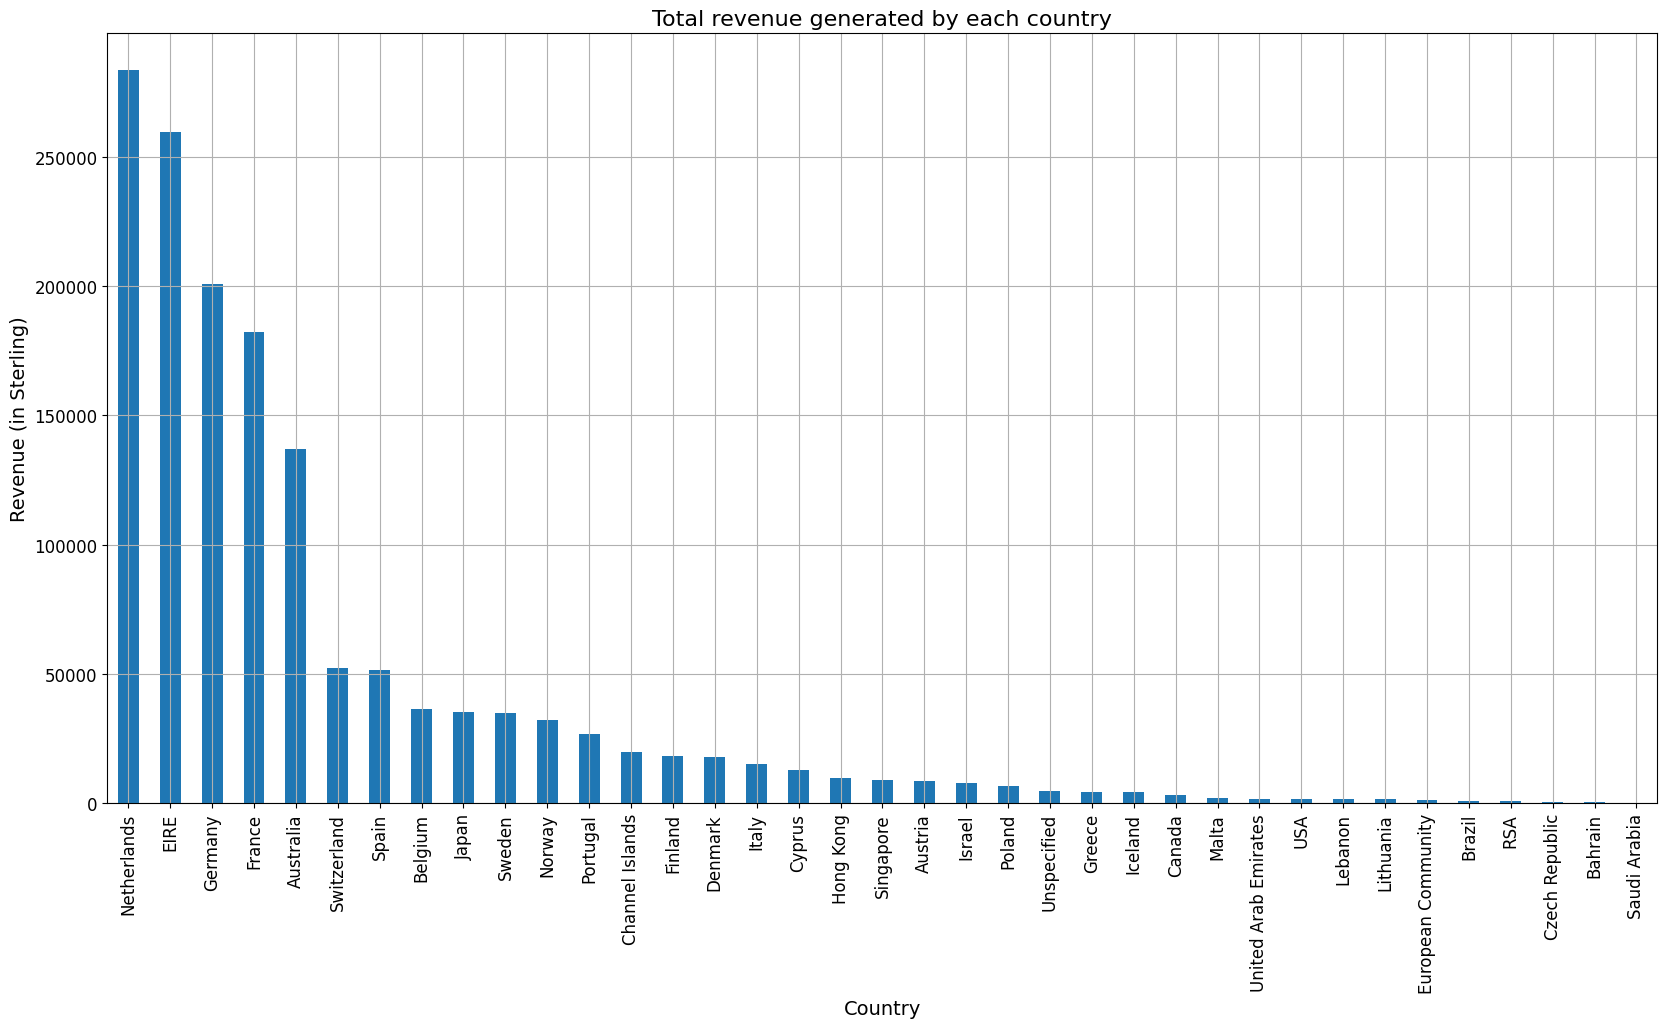

In [ ]:
figure = plt.figure(figsize=(20,10))

retail_data.groupby('Country')['Revenue'].sum().sort_values(ascending=False)[1:].plot.bar()

# Adding Cosmetics
plt.xlabel(xlabel='Country', fontsize=14)
plt.ylabel(ylabel='Revenue (in Sterling)', fontsize=14)
plt.title(label='Total revenue generated by each country', fontsize=16)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)

# Display the plot
plt.show()

**Observations:**

<a name = #Bar1></a>

- **Netherlands** and **EIRE**(Ireland) see a lot of traffic on the website.

- This is followed by **Germany**, **France** and **Australia** where all of these countries **generate** more than **100000 Sterling**.

**<h4>Question:** What is the customer distribution across each country?</h4>

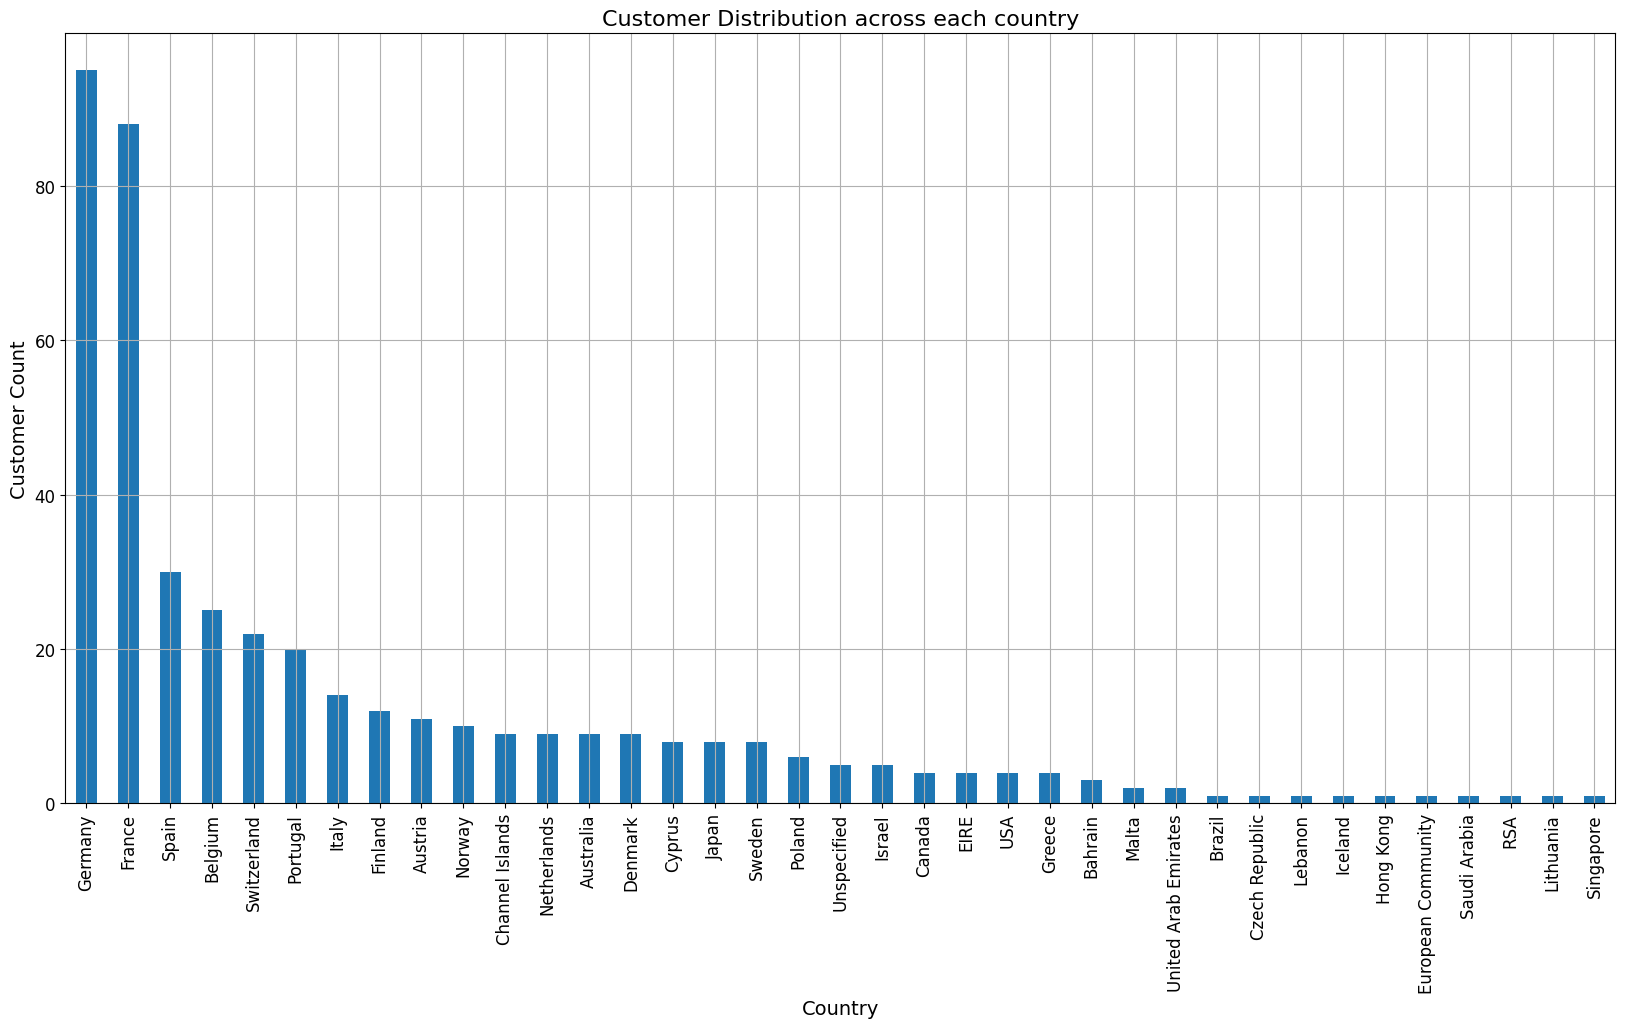

In [ ]:
figure = plt.figure(figsize=(20,10))

retail_data.groupby('Country')['CustomerID'].nunique().sort_values(ascending=False)[1:].plot.bar()

# Adding Cosmetics
plt.xlabel(xlabel='Country', fontsize=14)
plt.ylabel(ylabel='Customer Count', fontsize=14)
plt.title(label='Customer Distribution across each country', fontsize=16)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)

# Display the plot
plt.show()

**Observations:**

- **Germany** sees the **most amount** of customers on the website after the UK.

- But those customers **don't buy in bulk** or expensive products as the revenue generated by them is 3rd highest across the foreign countries.

- **Netherlands**, even though has **less customers**, brings in a lot of revenue as can be seen by the above bar plots.

**<h4>Question:** What is the total revenue generated per month?</h4>

In [ ]:
retail_data.columns

Index(['InvoiceNo', 'StockCode', 'Quantity', 'InvoiceDate', 'UnitPrice',
       'CustomerID', 'Country', 'year', 'month', 'hour', 'day', 'Revenue'],
      dtype='object')

In [ ]:
retail_data.groupby('month')['Revenue'].sum()

,Revenue
month,
April,481692.910
August,678120.500
December,1128876.640
February,487736.840
January,544537.530
July,665942.420
June,713097.320
March,668035.850
May,717595.100


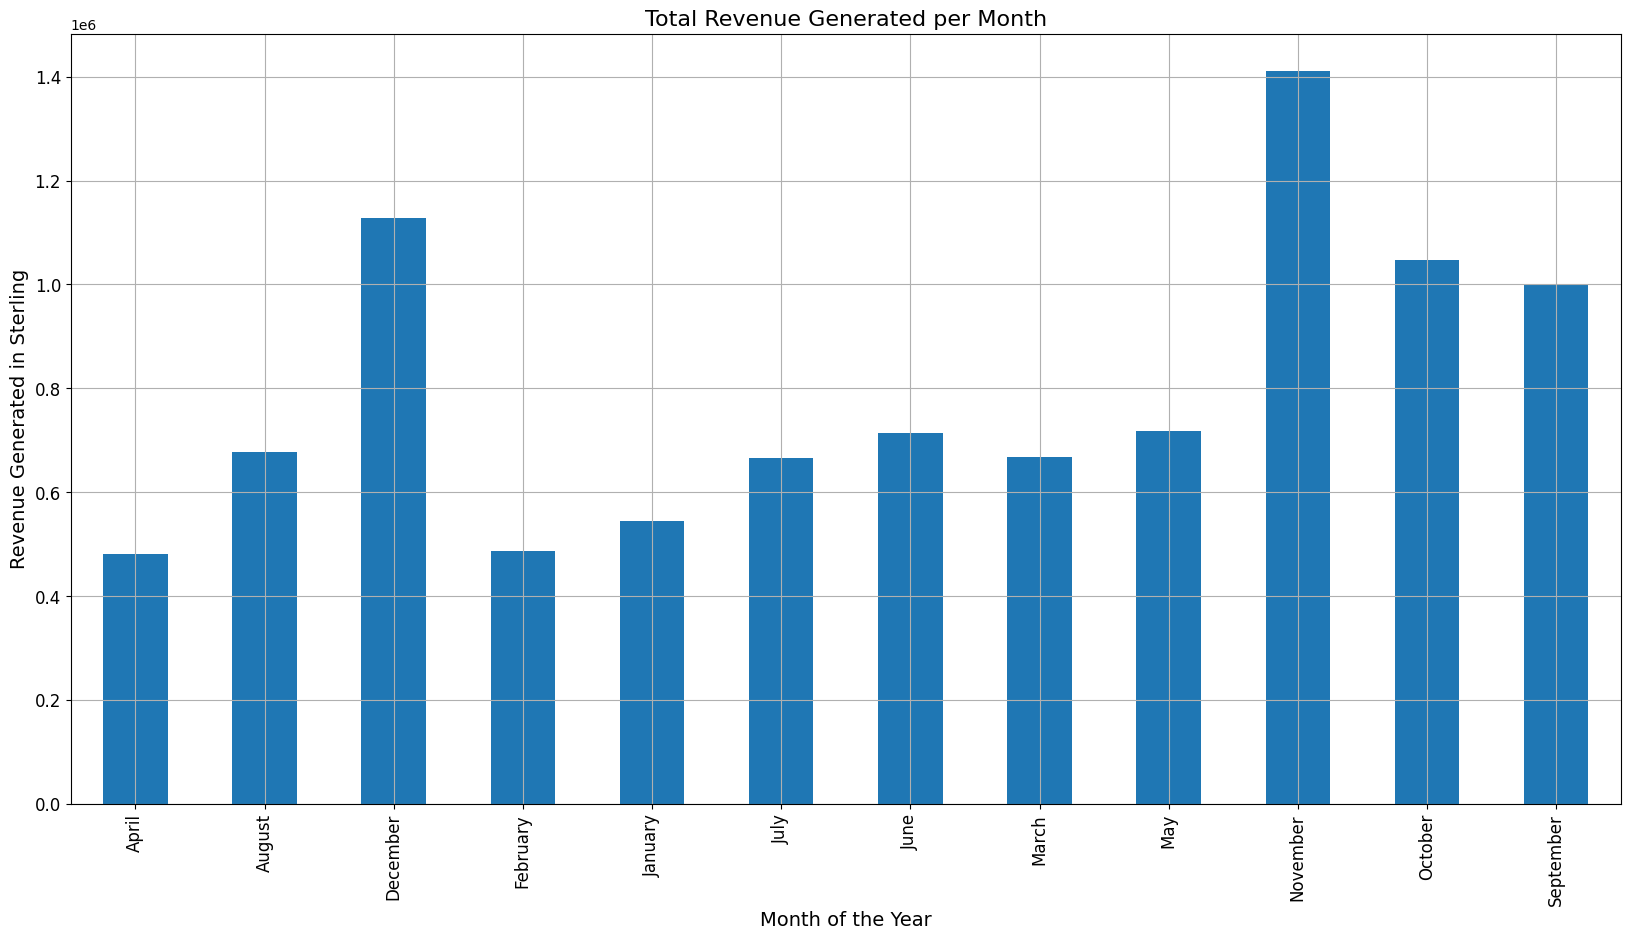

In [ ]:
figure = plt.figure(figsize=(20,10))

retail_data.groupby('month')['Revenue'].sum().plot.bar()

# Adding Cosmetics
plt.xlabel(xlabel='Month of the Year', fontsize=14)
plt.ylabel(ylabel='Revenue Generated in Sterling', fontsize=14)
plt.title(label='Total Revenue Generated per Month', fontsize=16)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)

# Display the plot
plt.show()

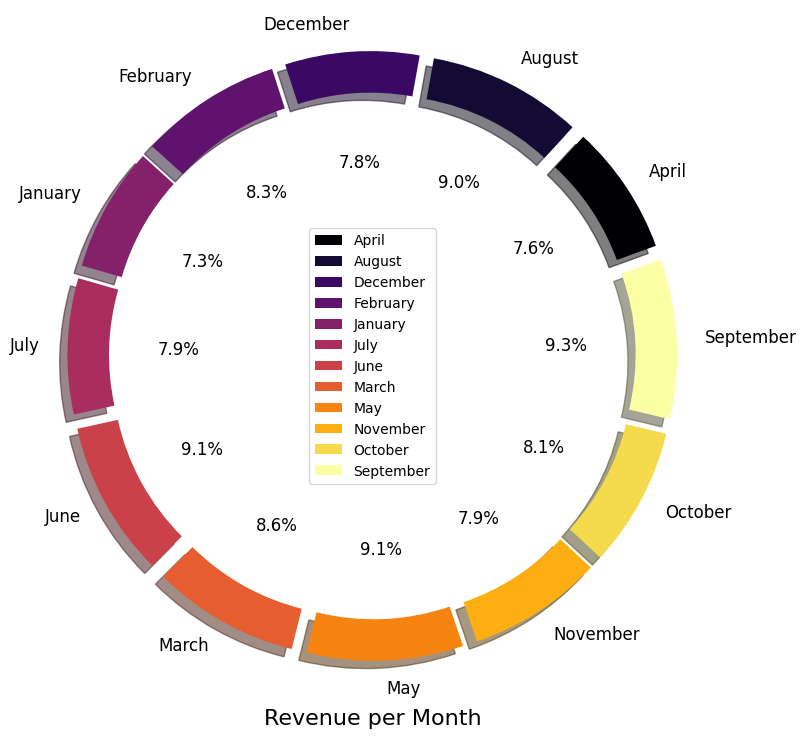

In [ ]:
# Creating a pie plot for revenue per month
# retail_data.groupby('month')['Revenue'].mean().plot(kind='pie',
#                                                                 autopct='%3.1f%%',
#                                                                 wedgeprops=dict(width=0.15),
#                                                                 explode=np.ones(13)/10,
#                                                                 figsize=(9, 9),
#                                                                 fontsize=12,
#                                                                 startangle=20,
#                                                                 shadow=True,
#                                                                 cmap='inferno',
#                                                                 legend=True,
#                                                                 label='')


retail_data.groupby('month')['Revenue'].mean().plot(kind='pie',autopct='%3.1f%%',wedgeprops=dict(width=0.15),explode=np.ones(12)/10,figsize=(9, 9),fontsize=12,startangle=20,shadow=True,cmap='inferno',legend=True,label='',)
# Adding some cosmetics
plt.xlabel(xlabel='Revenue per Month', fontsize=16)

plt.legend(loc = 'center')
# Display the output
plt.show()

**Observations:**

- Highest revenue generated on Novemeber month more than 1.4M Steling
- Second highest revenue generated in december about 1.1M Sterling

**<h4>Question:** How many orders have been placed at each hour of a day?</h4>

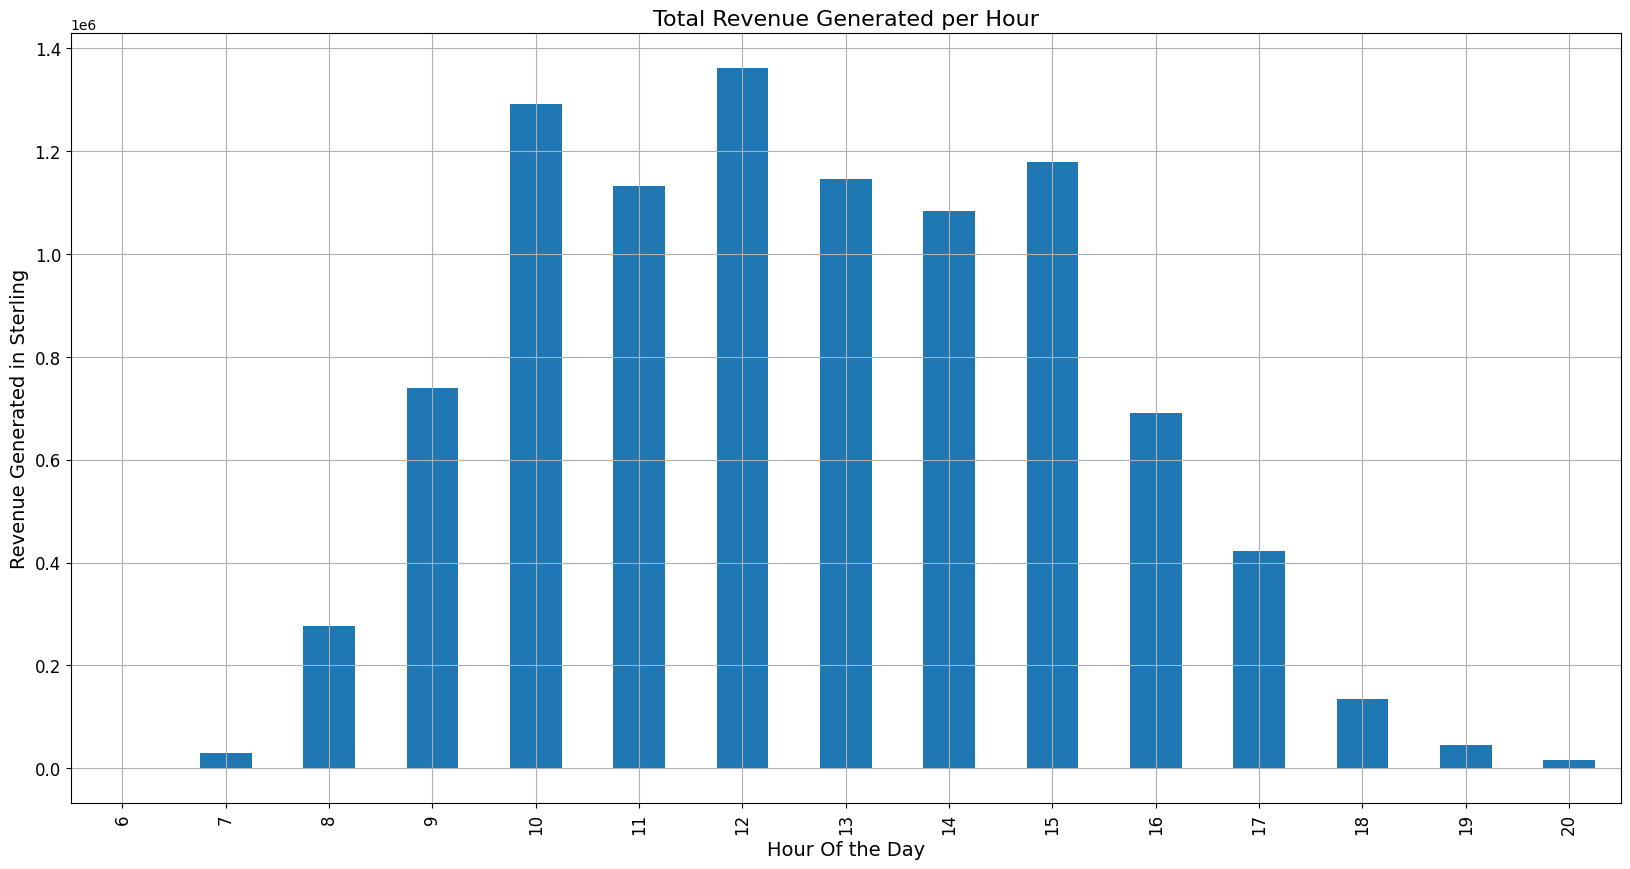

In [ ]:
figure = plt.figure(figsize=(20,10))

retail_data.groupby('hour')['Revenue'].sum().plot.bar()

# Adding Cosmetics
plt.xlabel(xlabel='Hour Of the Day', fontsize=14)
plt.ylabel(ylabel='Revenue Generated in Sterling', fontsize=14)
plt.title(label='Total Revenue Generated per Hour', fontsize=16)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)

# Display the plot
plt.show()

**Observations:**

- We can observe that most of the orders are placed after **8:00 AM till 8:00 PM** London Time.

- The **highest amount** of orders are placed around **12:00 PM** London Time.

**<h4>Question:** What is the frequency of orders for weekdays?</h4>

In [ ]:
retail_data.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,hour,day,Revenue
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,December,8,3,15.30
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,December,8,3,20.34
2,536365,84406B,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,December,8,3,22.00
3,536365,84029G,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,December,8,3,20.34
4,536365,84029E,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,December,8,3,20.34


In [ ]:
np.dtype(retail_data['day'])

dtype('O')

In [ ]:
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day= ['1','2','3','4','5','6','7']
retail_data['day'] = retail_data['day'].astype(str)
retail_data['day'] = retail_data['day'].replace(day,days_of_week)

retail_data.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,hour,day,Revenue
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,December,8,Wednesday,15.30
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,December,8,Wednesday,20.34
2,536365,84406B,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,December,8,Wednesday,22.00
3,536365,84029G,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,December,8,Wednesday,20.34
4,536365,84029E,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,December,8,Wednesday,20.34


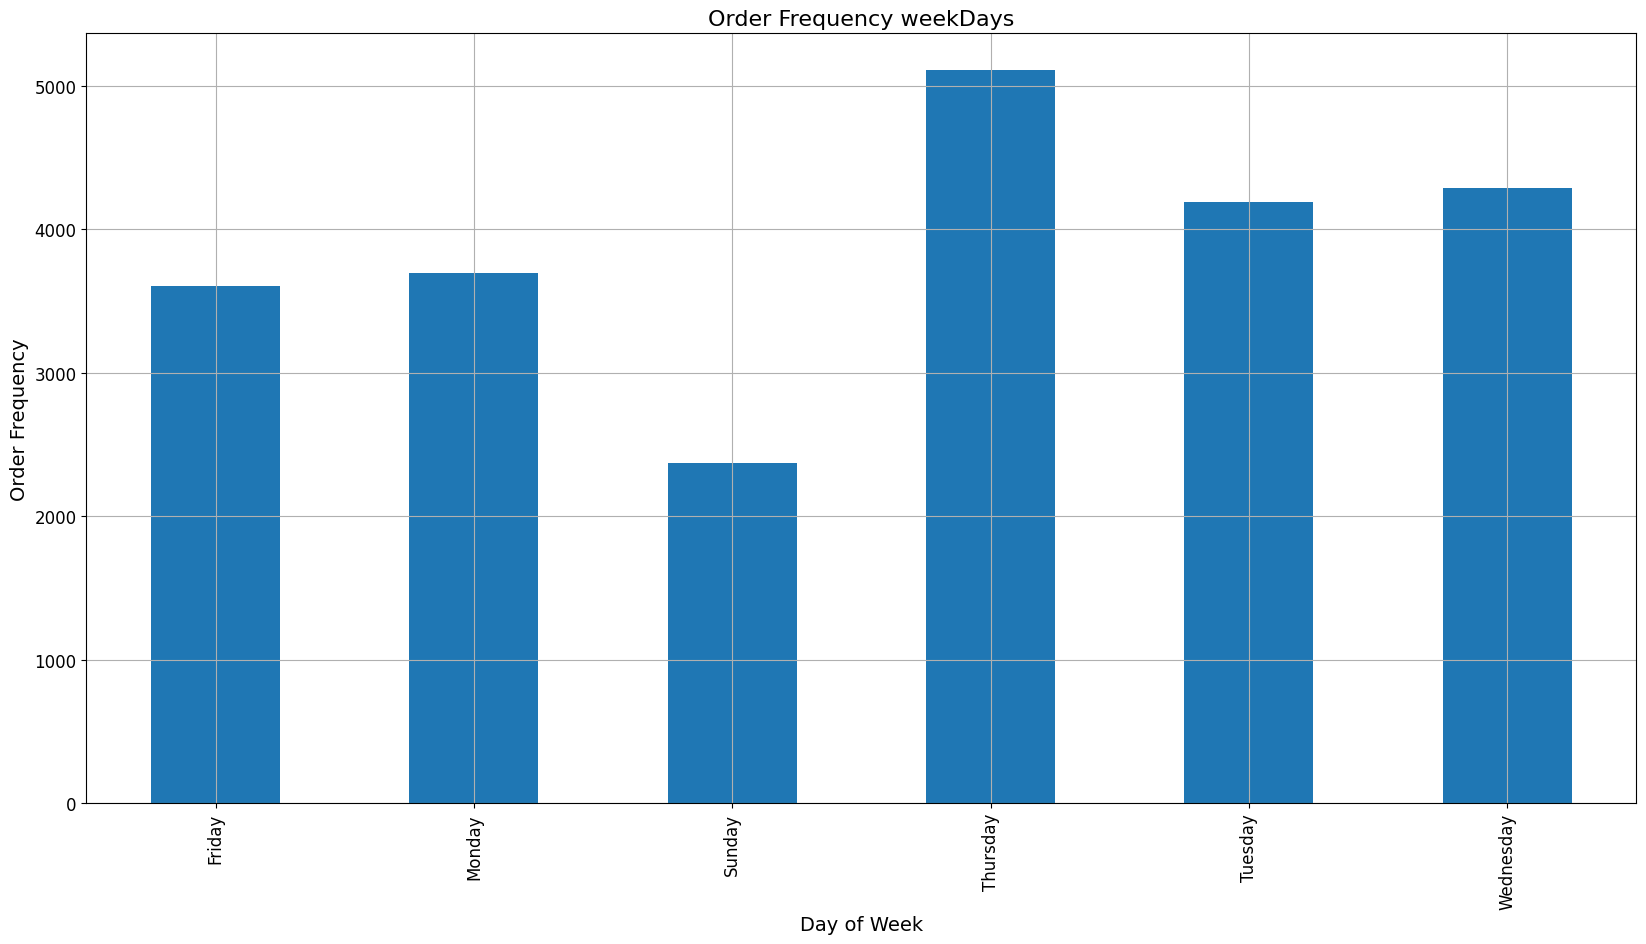

In [ ]:
figure = plt.figure(figsize=(20,10))

retail_data.groupby('day')['InvoiceNo'].nunique().plot.bar()

# Adding Cosmetics
plt.xlabel(xlabel='Day of Week', fontsize=14)
plt.ylabel(ylabel='Order Frequency', fontsize=14)
plt.title(label='Order Frequency weekDays', fontsize=16)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)

# Display the plot
plt.show()

**Observations:**

- There are **no orders** that were placed on **Saturday**.

- **Most** of the orders are placed on **Thursday** followed by **Wednesdays** and **Tuesdays**.

- Orders are placed the **least** on **weekends**.

**<h4>Question:** What is the frequency of orders for weekdays vs hours per day?</h4>

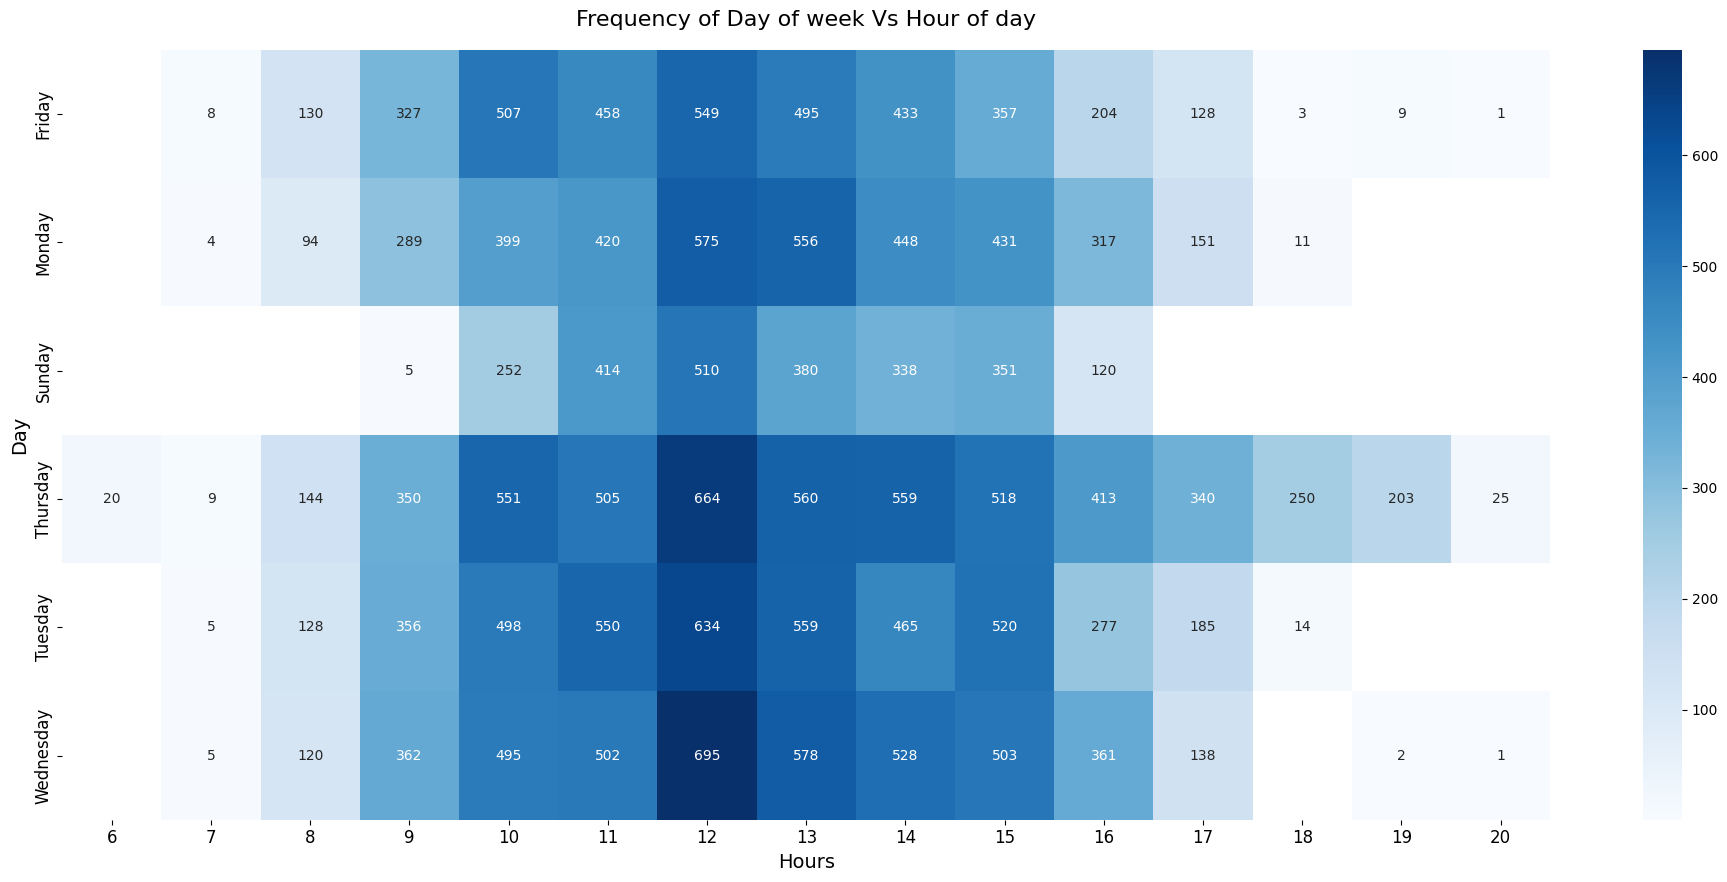

In [ ]:
plt.figure(figsize=(24, 10))

# Creating a group and sorting unique values for invoice numbers
grouped_df  = retail_data.groupby(["day", "hour"])["InvoiceNo"].unique().reset_index()

# Calculating number of orders for every hour of every day
grouped_df["number_of_orders"] = grouped_df["InvoiceNo"].apply(len)

# Creating a pivot table from the grouped_df
# grouped_df = grouped_df.pivot('day', 'hour', 'number_of_orders')
grouped_df = grouped_df.pivot(index='day', columns='hour', values='number_of_orders')


# Create a heatmap
sns.heatmap(data=grouped_df, annot=True, cmap='Blues', fmt='g')

# Adding some cosmetics
plt.title(label="Frequency of Day of week Vs Hour of day", fontsize=16, y=1.02)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel(xlabel='Hours', fontsize=14)
plt.ylabel(ylabel='Day', fontsize=14)
#plt.grid(b=True)

# Display the heatmap
plt.show()

**Observations:**

- Majority number of orders have been placed at **noon** time of **Wednesdays** and followed by the same time on **Thursdays**.

- We can see orders are placed at **every hour** on **Thursdays**.

- Most of the orders are placed from **Tuesdays** to **Fridays** from **10:00 AM** to **1:00 PM** London Time.

**<h4>Question:** What is the average revenue per order?</h4>

In [ ]:
retail_data.groupby('InvoiceNo')['Revenue'].mean().describe()

,Revenue
count,23265.000000
mean,26.796290
std,1774.686403
min,-168469.600000
25%,6.028889
50%,16.195714
75%,25.955051
max,168469.600000


**Observation:**

- The average revenue per order is **26.79 Sterling** for the online retailer.

**<h4>Question:** What is the total monthly revenue in UK?</h4>

In [ ]:
retail_data[retail_data['Country'] == 'United Kingdom'].groupby('month')['Revenue'].sum().sort_values(ascending=False)

,Revenue
month,
November,1243720.210
December,1019662.870
October,862330.860
September,846957.591
May,596210.390
June,582396.530
July,555716.740
March,550609.790
August,538255.250


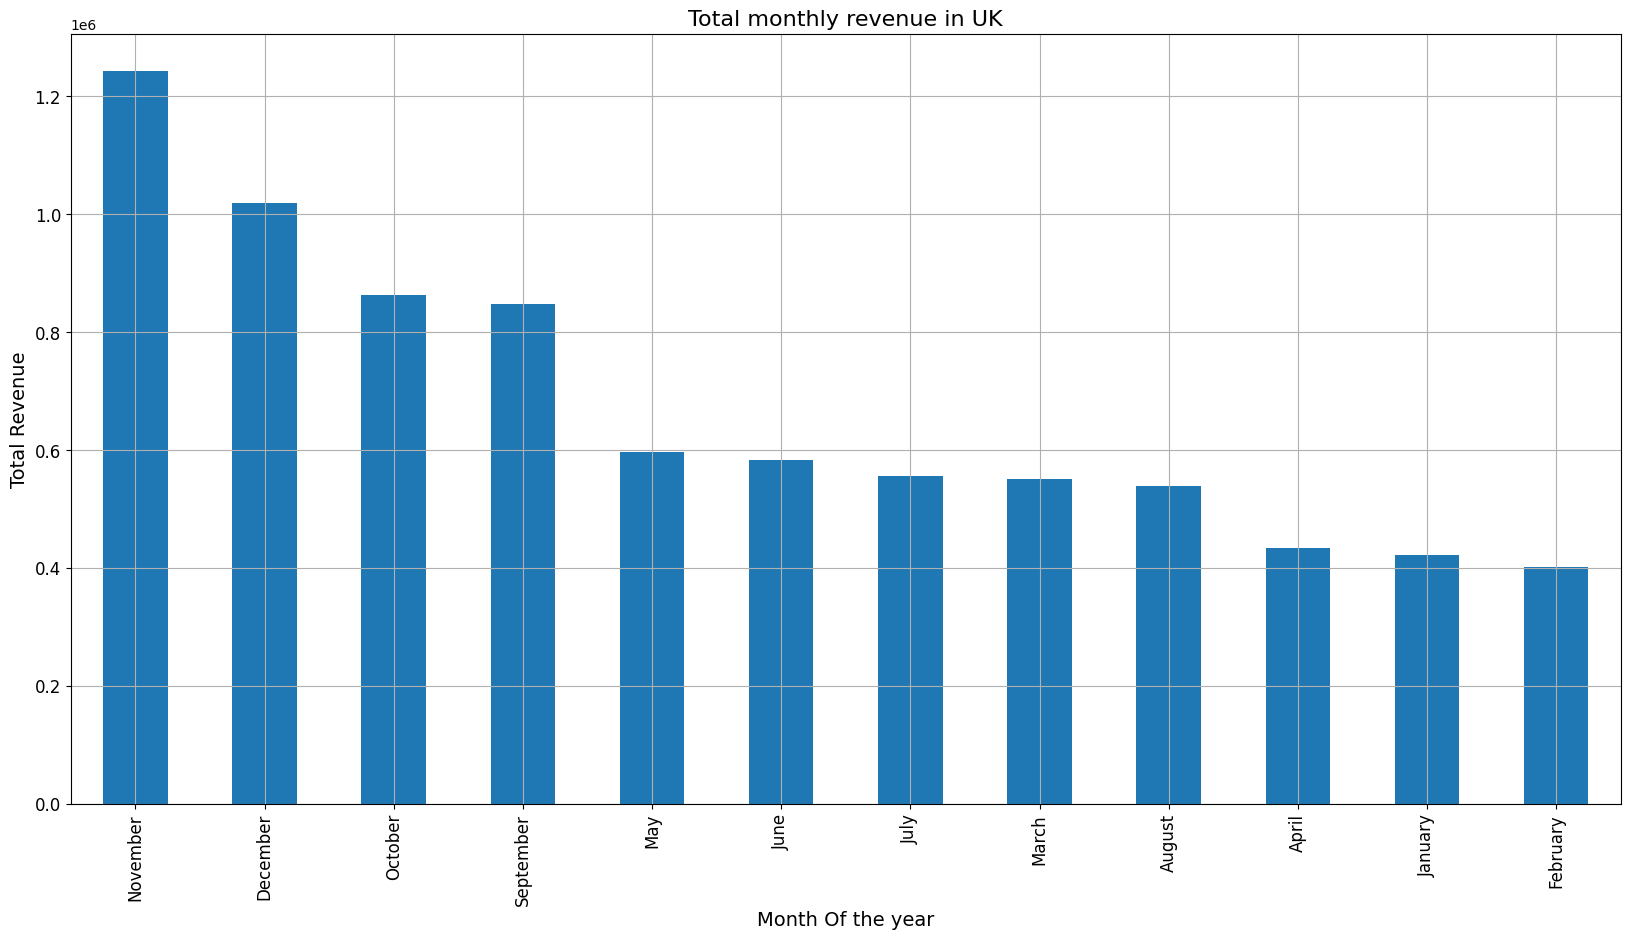

In [ ]:
figure = plt.figure(figsize=(20,10))

retail_data[retail_data['Country'] == 'United Kingdom'].groupby('month')['Revenue'].sum().sort_values(ascending=False).plot.bar()

# Adding Cosmetics
plt.xlabel(xlabel='Month Of the year', fontsize=14)
plt.ylabel(ylabel='Total Revenue', fontsize=14)
plt.title(label='Total monthly revenue in UK', fontsize=16)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)

# Display the plot
plt.show()

**Observations:**

- **November** saw the highest amount of sales in the UK followed by **October**, **September**, and **May** months.

**<h4>Question:** Which products are most bought in UK?</h4>

In [ ]:
retail_data[retail_data['Country'] == 'United Kingdom'].groupby('StockCode')['Quantity'].sum().sort_values(ascending=False)

,Quantity
StockCode,
22197,52905
84077,48230
85099B,43060
84879,33580
85123A,32940
...,...
79323W,-8
BANK CHARGES,-13
21645,-24


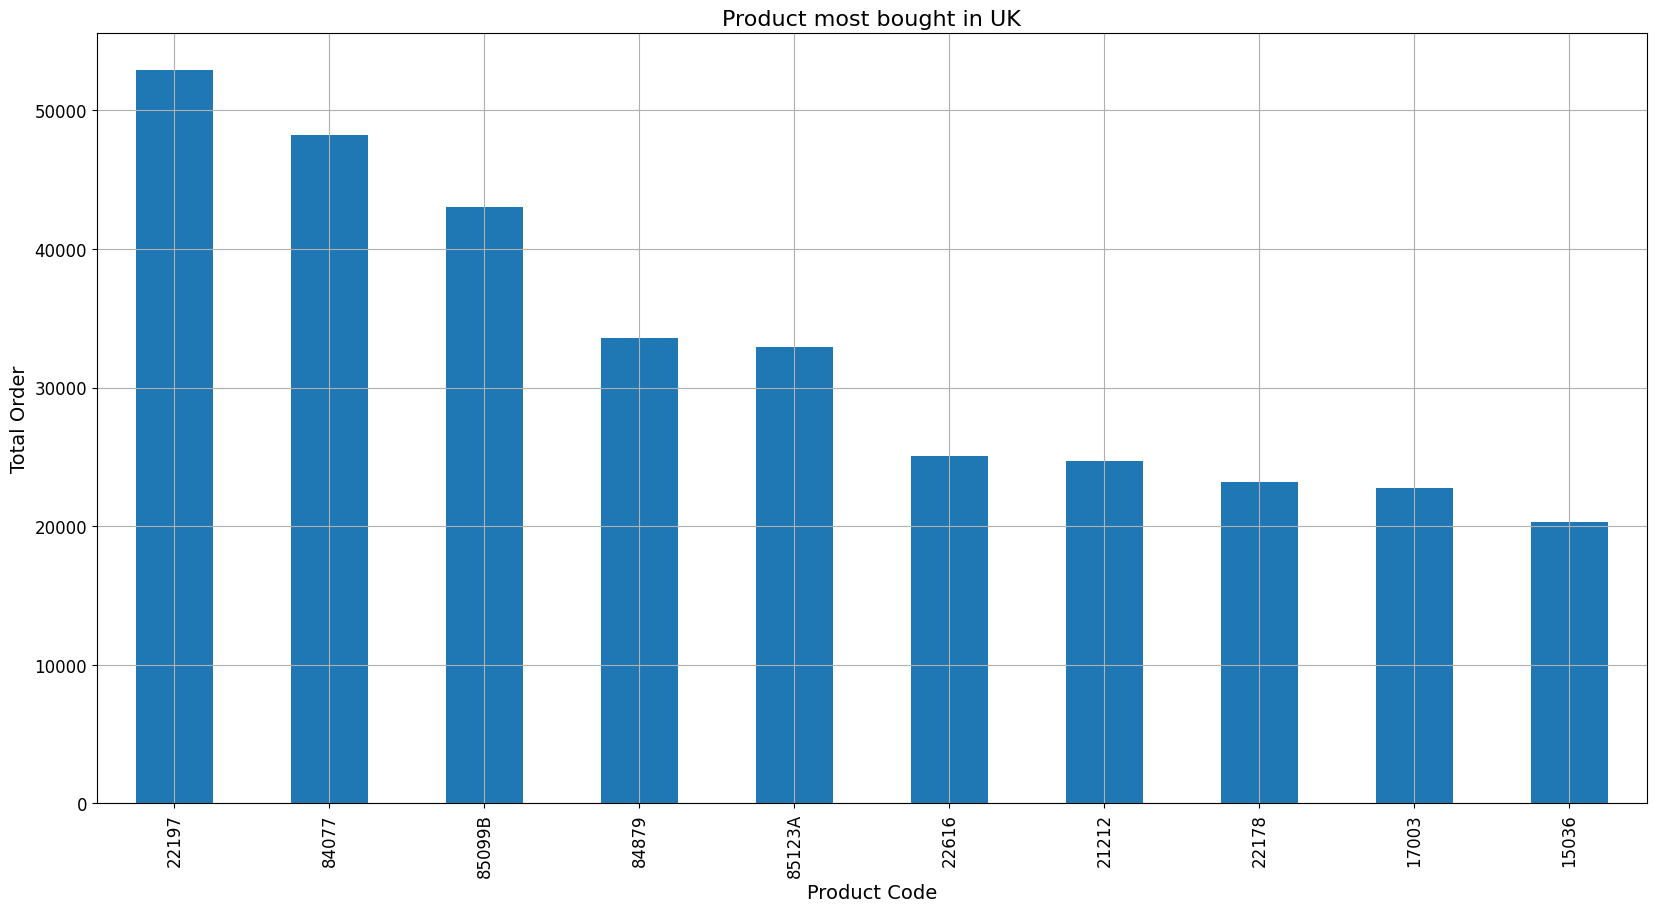

In [ ]:
figure = plt.figure(figsize=(20,10))

retail_data[retail_data['Country'] == 'United Kingdom'].groupby('StockCode')['Quantity'].sum().sort_values(ascending=False)[:10].plot.bar()

# Adding Cosmetics
plt.xlabel(xlabel='Product Code', fontsize=14)
plt.ylabel(ylabel='Total Order', fontsize=14)
plt.title(label='Product most bought in UK', fontsize=16)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)

# Display the plot
plt.show()

**Observations:**

- **Product with Code 22197** have been sold the most with **52905 units**.

- This product is **followed** by **Product code 84077** and **85099B**.

**<h4>Question:** How many customers were active in all the months in the UK?<h4>

In [ ]:
retail_data[retail_data['Country'] == 'United Kingdom'].groupby('month')['CustomerID'].nunique().sort_values(ascending=False)

,CustomerID
month,
November,1546
October,1284
December,1250
September,1174
May,985
June,942
March,921
July,889
August,865


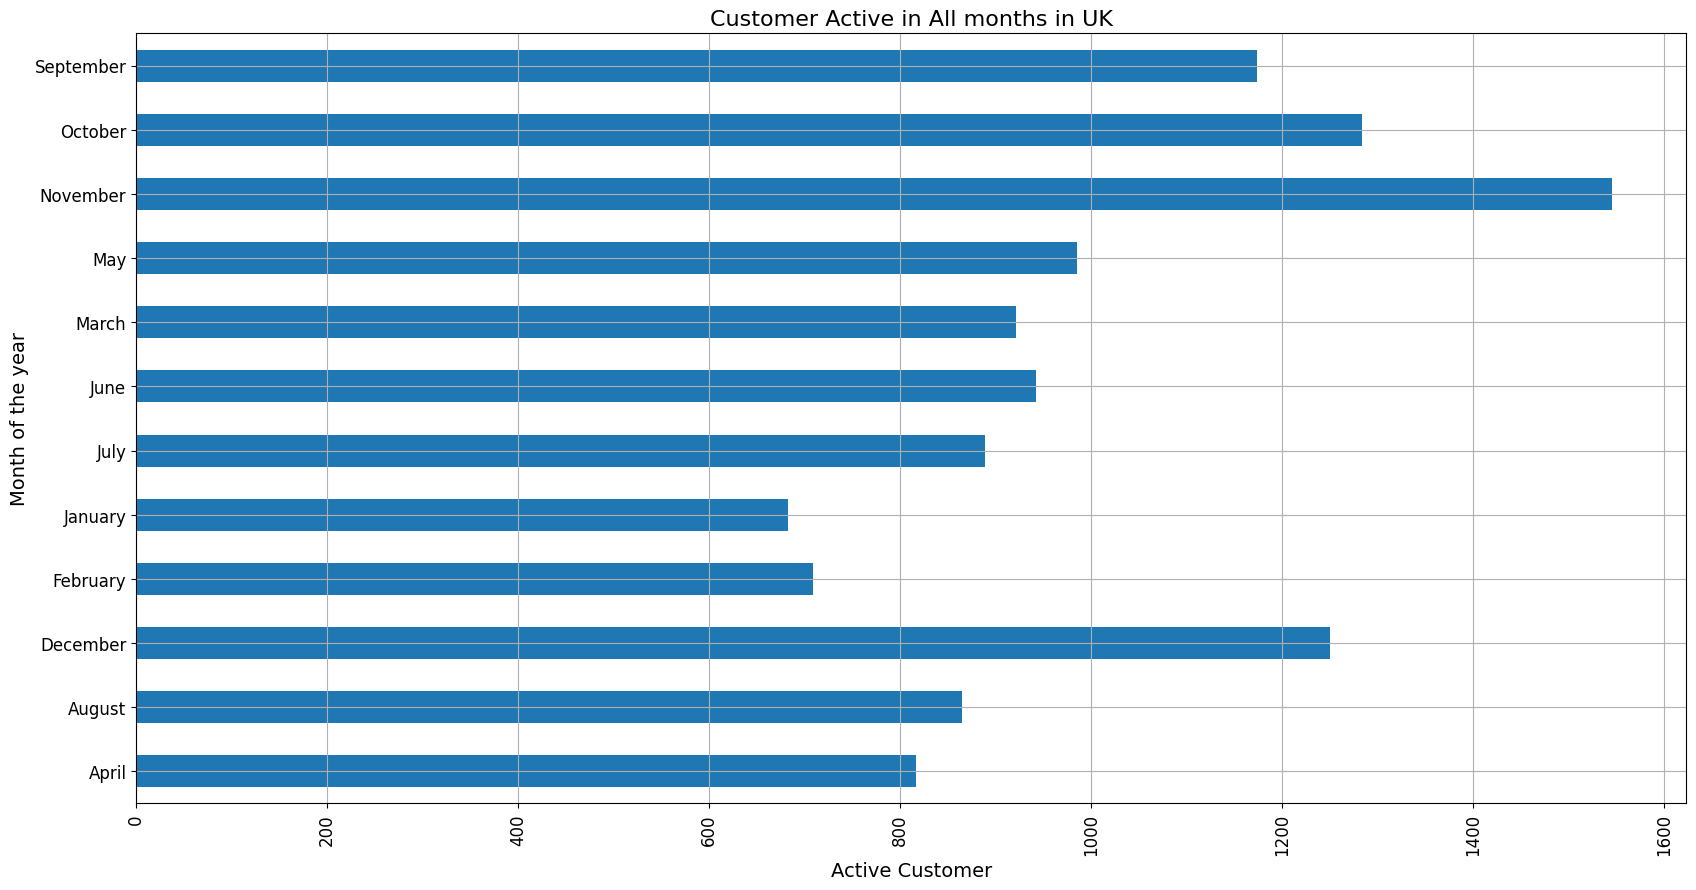

In [ ]:
figure = plt.figure(figsize=(20,10))

retail_data[retail_data['Country'] == 'United Kingdom'].groupby('month')['CustomerID'].nunique().plot.barh()

# Adding Cosmetics
plt.xlabel(xlabel='Active Customer', fontsize=14)
plt.ylabel(ylabel='Month of the year', fontsize=14)
plt.title(label='Customer Active in All months in UK', fontsize=16)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)

# Display the plot
plt.show()

**Observations:**

- **November** saw the **most** number of **active** customers in the UK with **1548 customers**.

- **September** and **October** too have a lot of active customers.

- This is more in **correspondence** to the huge **number** of **orders** placed in these months as well.

<a name = Section9></a>

---
# **Summarization**
---

<a name = Section91></a>
### **Conclusion**

- We almost have **16.46% cancelled orders** which is a slightly high number for an online retailer.

- **Studying** these **cancelled orders** further may help in preventing future cancellation.

- Let's first get an overview of the general customers purchase behavior and then dig deeper.

- The average **number of unique items per order** are **17**.

- The average revenue per order is **34.39 Sterling** for the online retailer.

- Not only **most sales revenues** are achieved in the **UK**, but also **most customers** are **located** there too.

- Netherlands seems like one of the **bulk buyers** as it has **less than 100 customers** yet brings in the most amount of revenue **outside** the **UK**.

<a name = Section92></a>
### **Actionable Insights**

- By analysing the data in this way, we can uncover **groups of customers** that behave in similar ways.

- **UK**, **Germany** and **Netherlands** should be the **primary targets** for advertisments.

- This level of **customer segmentation** is useful in marketing to these groups of customers appropriately.

- A **marketing campaign** that works for a group of customers that places **low value orders** frequently may not be appropriate for customers who place sporadic, **high value orders**.

- Make relevant **product recommendations** to the customers using **precision marketing**.

- Empower your customers to actively share their details, **make your customers part of the process**.

- Encourage them to share their **data** with you through **conversations**, **surveys**, and other **research methods**.

- Doing so not only help you get to know them better, but it also **builds trust**.

- It would be important to **talk with the e-commerce team to understand the business, customers, strategic and tactical objectives**.